In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

from fnmatch import fnmatch

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from pattern import web

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import seaborn as sns #sets up styles and gives us more plotting options
import dateutil.parser as dparser

plt.rcParams['figure.figsize'] = (20.0, 8.0)


/home/roelof/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


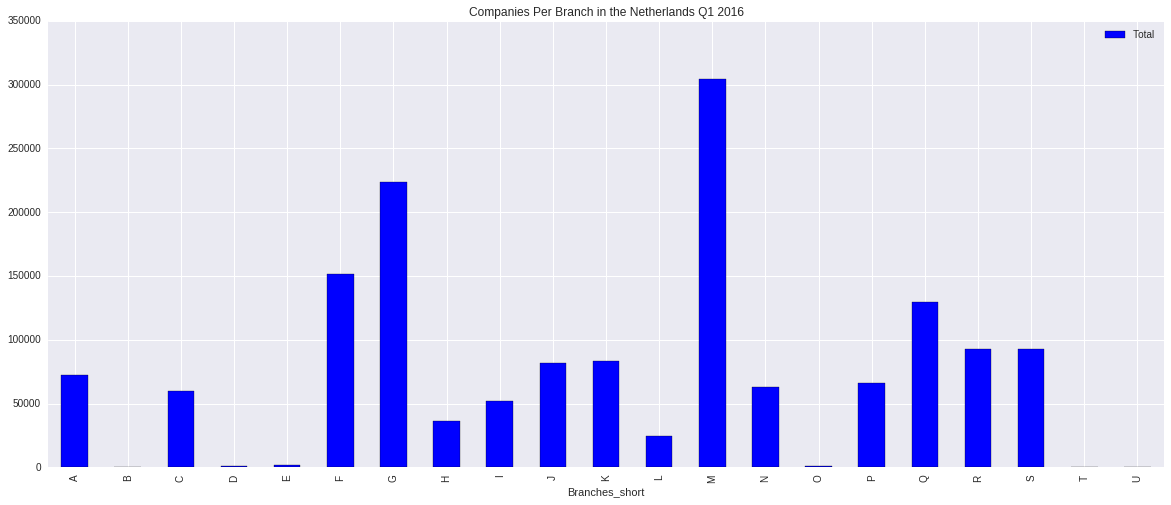

In [2]:
branch = pd.read_csv("companies per branch.csv",index_col="Branches_short")
ax1 = branch.Total.plot(kind="bar", legend="True")
ax1.set_title("Companies Per Branch in the Netherlands Q1 2016")

We kunnen aan de grafiek al zien dat F,G en M de grootste branches zijn.

In [3]:
branch_sorted = branch.sort_values("Total", ascending=0).drop(branch.columns[[0,1,3,4,5,6,7,8,9,10,11,12]], axis=1)
branch_sorted["%"]=branch_sorted.Total/branch_sorted.Total.sum()
branch_sorted["cumulative%"]=branch_sorted.Total.cumsum()/branch_sorted.Total.sum()

print branch_sorted
#branch_sorted["cumulative%"].plot(kind="line", xticks=branch_sorted["Branches_short"])

                 Total         %  cumulative%
Branches_short                               
M               304715  0.198374     0.198374
G               223745  0.145662     0.344036
F               151485  0.098619     0.442655
Q               129230  0.084131     0.526786
S                92580  0.060271     0.587057
R                92530  0.060239     0.647296
K                83130  0.054119     0.701415
J                81510  0.053064     0.754479
A                72200  0.047003     0.801482
P                66395  0.043224     0.844707
N                63020  0.041027     0.885734
C                59645  0.038830     0.924563
I                51660  0.033631     0.958195
H                36125  0.023518     0.981713
L                24395  0.015882     0.997594
E                 1540  0.001003     0.998597
D                  985  0.000641     0.999238
O                  755  0.000492     0.999730
B                  395  0.000257     0.999987
T                   15  0.000010  

Als we ons focussen op de eerste 5 industries dan bereiken we zo'n ~60% van de markt. De 5 industrieen zijn:

In [4]:
#branch.sort_values.bedrijfstakken_SBI_2008
branch.sort_values("Total", ascending=0).bedrijfstakken_SBI_2008[0:5]

Branches_short
M    M Specialistische zakelijke diensten
G                                G Handel
F                        F Bouwnijverheid
Q          Q Gezondheids- en welzijnszorg
S               S Overige dienstverlening
Name: bedrijfstakken_SBI_2008, dtype: object

# Branche levels

Er is nog preciesere data beschikbaar bij CBS opgesplits in de grote van het bedrijf en het onderwerp van de business. 

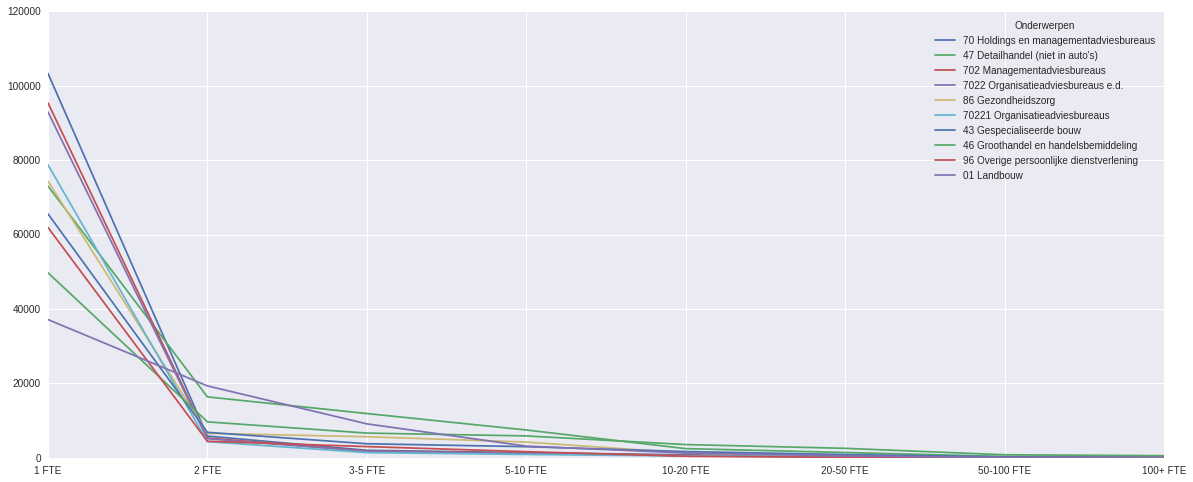

In [5]:
levels = pd.read_csv("companies per level.csv", index_col="Onderwerpen")
#print levels[5:7]
#levels.tail(10)

# remove all totaal bedrijven which are zero
levels = levels.loc[~(levels["Totaal bedrijven"]==0)]
# remove all duplicates 
levels = levels[~levels.duplicated(["Totaal bedrijven"])]

#drop columns before doing graph
levels.sort_values("Totaal bedrijven", ascending=0).drop(levels.columns[[0,1,2,3]], axis=1)[0:10].T.plot(kind="line")


Gesorteerde lijst van alle onderwerpen. We zien hier dat de 1 FTE (full Time Employee) deze lijst een "scheef" trekt. Om de grafieken beter te kunnen bestuderen, laten we de kolom 1 FTE weg.

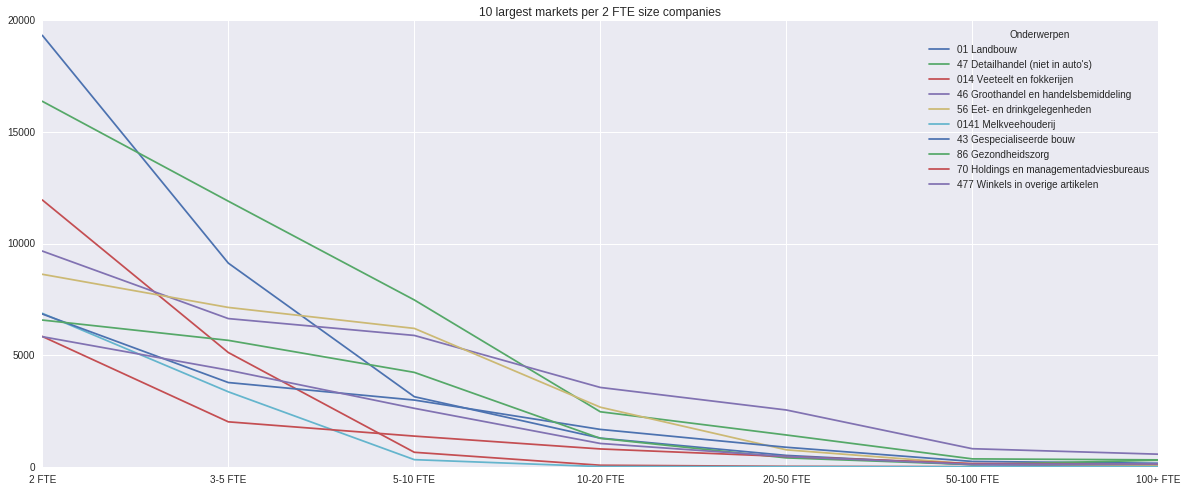

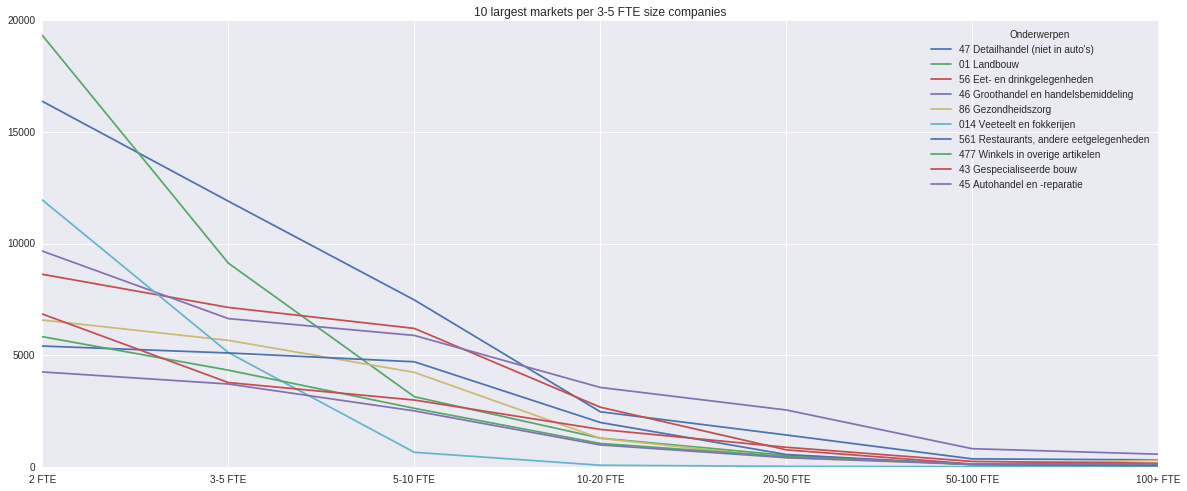

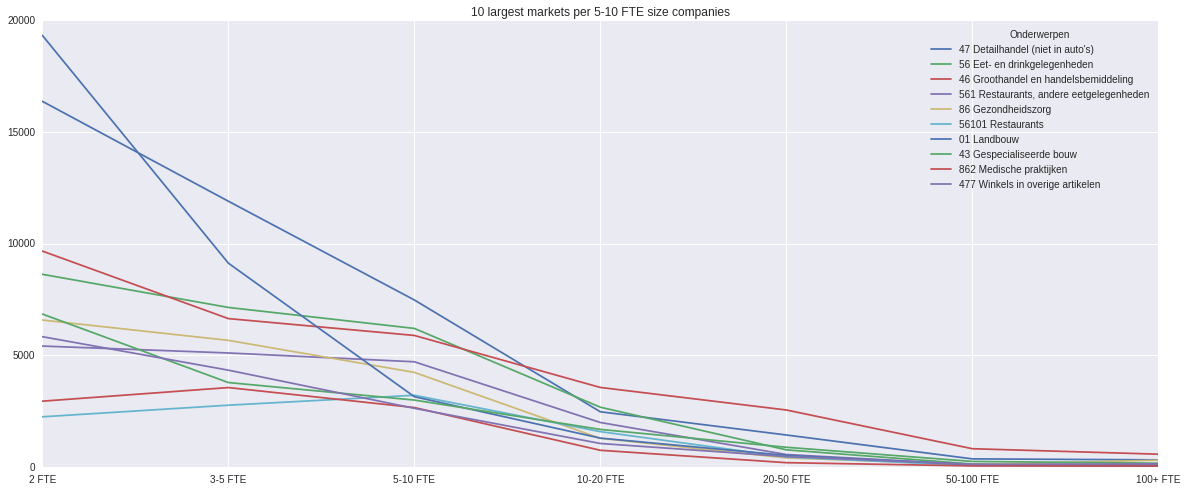

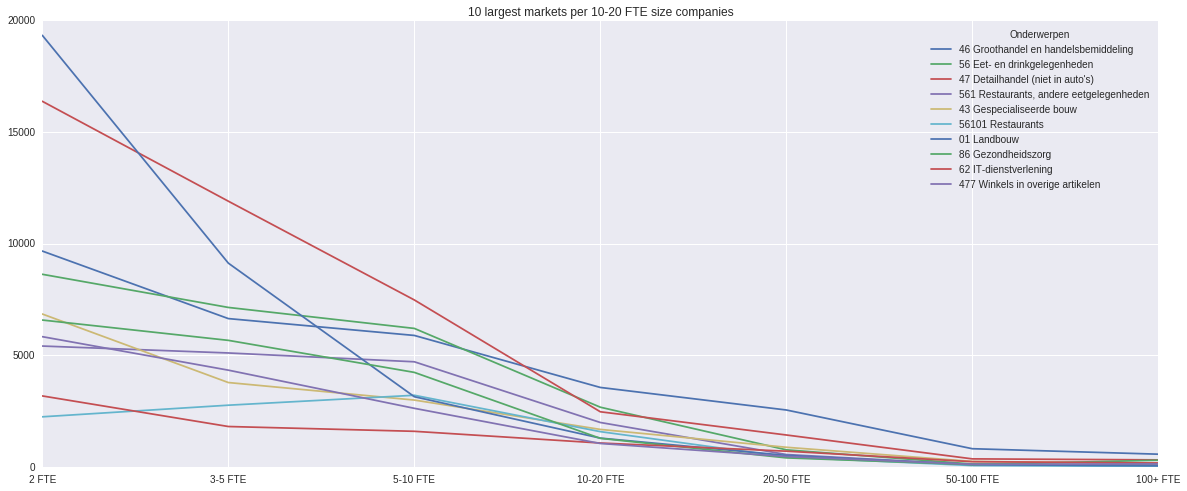

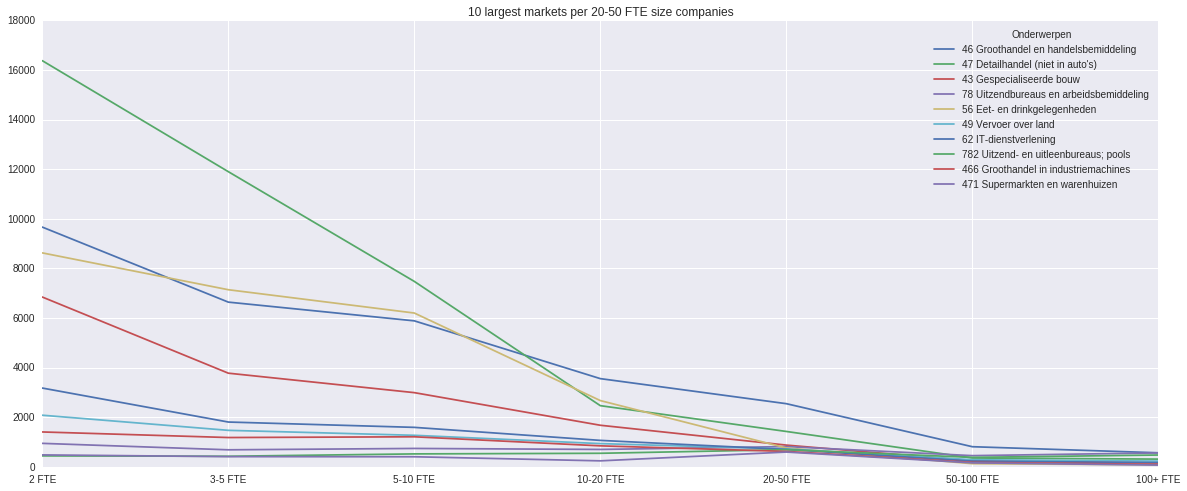

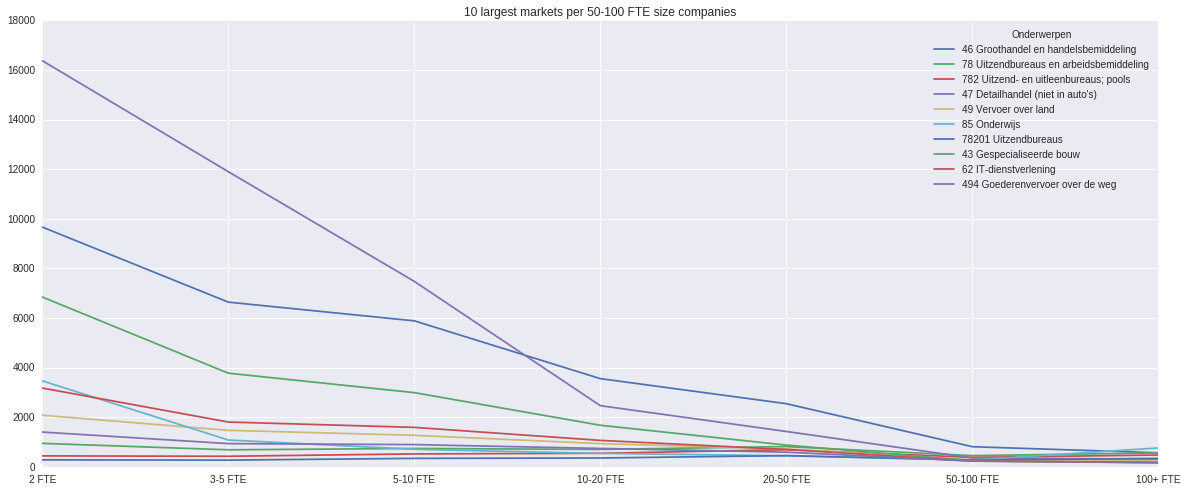

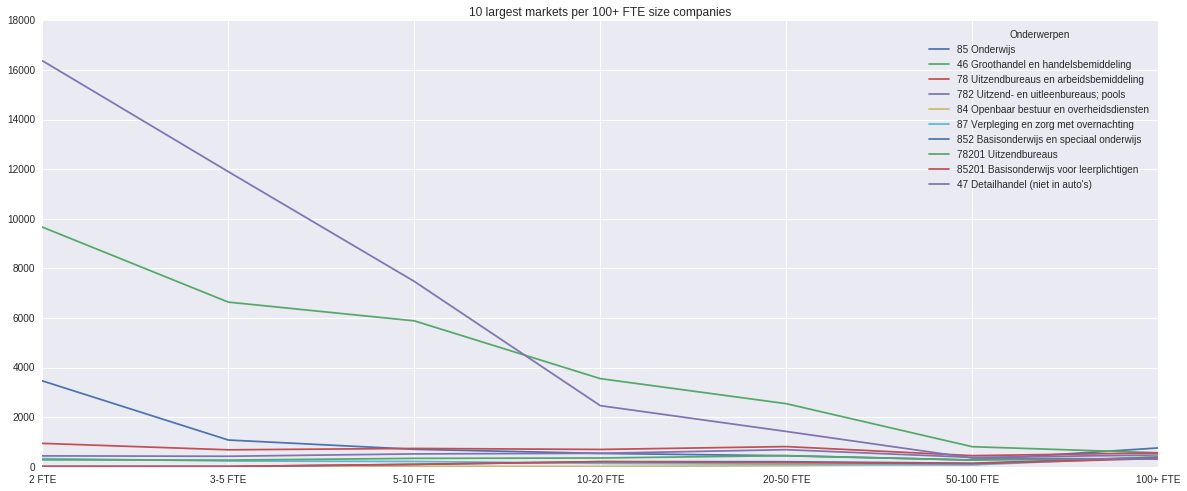

In [6]:
levels.sort_values("2 FTE", ascending=0).drop(levels.columns[[0,1,2,3,4]], axis=1)[0:10].T.plot(kind="line", title="10 largest markets per 2 FTE size companies")
levels.sort_values("3-5 FTE", ascending=0).drop(levels.columns[[0,1,2,3,4]], axis=1)[0:10].T.plot(kind="line", title="10 largest markets per 3-5 FTE size companies")
levels.sort_values("5-10 FTE", ascending=0).drop(levels.columns[[0,1,2,3,4]], axis=1)[0:10].T.plot(kind="line", title="10 largest markets per 5-10 FTE size companies")
levels.sort_values("10-20 FTE", ascending=0).drop(levels.columns[[0,1,2,3,4]], axis=1)[0:10].T.plot(kind="line", title="10 largest markets per 10-20 FTE size companies")
levels.sort_values("20-50 FTE", ascending=0).drop(levels.columns[[0,1,2,3,4]], axis=1)[0:10].T.plot(kind="line", title="10 largest markets per 20-50 FTE size companies")
levels.sort_values("50-100 FTE", ascending=0).drop(levels.columns[[0,1,2,3,4]], axis=1)[0:10].T.plot(kind="line", title="10 largest markets per 50-100 FTE size companies")
levels.sort_values("100+ FTE", ascending=0).drop(levels.columns[[0,1,2,3,4]], axis=1)[0:10].T.plot(kind="line", title="10 largest markets per 100+ FTE size companies")
